<a href="https://colab.research.google.com/github/mnocerino23/Wildfire-Forecaster/blob/main/Classifiers_trainwithsmallerdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Now that we have gathered data from kaggle, NOAA, the California Department of Water resources, and the Open-Elevation API into two consistent datasets, we will drop columns that are not necessary for training our models and take care of some final preprocessing.

In this file, I will start to build multi-class classifiers using Support Vector Machine, Gaussian Naive Bayes, Decision Tree, Random Forest, KNN, Gradient Boosting, and Neural Networks. 

The target feature will be ***Fire Size Class*** as we want to predict the size/risk of a large fire given certain weather and snow conditions.


I will deploy the following techniques:

1.   One-Hot Encoding of Categorical Variables
2.   Feature Selection
3.   Splitting the training and testing data
4.   Cross-Validation



In [2838]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

#Read in the two final datasets. The first contains over 110,000 fires from 2001-2015 while the second has 1,000 more recent, larger fires.
wildfire_set1 = pd.read_csv('/content/drive/MyDrive/Data_Science_Projects/Wildfires/wildfire_set1_w_allfeatures.csv')
wildfire_set2 = pd.read_csv('/content/drive/MyDrive/Data_Science_Projects/Wildfires/wildfire_set2_w_allfeatures.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2839]:
wildfire_set1.head(5)

,Unnamed: 0,Year,Name,AcresBurned,Fire Size Rank,Cause,SOURCE_REPORTING_UNIT_NAME,DaysBurn,Discovery Month,Discovered DOY,...,DX90_2M,DP10_2M,Receives Snow,Snow Station,River Basin,Mar_SP,Mar_WC,Mar_Dens,Has_Elevation,Elevation
0,0,2005,FOUNTAIN,0.10,A,Miscellaneous,Plumas National Forest,1.0,Feb,33.0,...,0.0,19.0,1.0,eureka_lake,Feather,79.6,34.0,0.43,1,2965.8432
1,1,2004,PIGEON,0.25,A,Lightning,Eldorado National Forest,1.0,May,133.0,...,0.0,3.0,1.0,ward_creek_2,Lake Tahoe,108.6,38.1,0.35,1,6207.2736
2,2,2004,SLACK,0.10,A,Debris Burning,Eldorado National Forest,1.0,Jun,152.0,...,0.0,11.0,1.0,ward_creek_2,Lake Tahoe,108.6,38.1,0.35,1,3454.6824
3,3,2004,DEER,0.10,A,Lightning,Eldorado National Forest,5.0,Jun,180.0,...,0.0,3.0,1.0,echo_summit,American,87.2,28.4,0.33,1,7759.0920
4,4,2004,STEVENOT,0.10,A,Lightning,Eldorado National Forest,5.0,Jun,180.0,...,0.0,3.0,1.0,echo_summit,American,87.2,28.4,0.33,1,7598.3328


In [2840]:
wildfire_set2.head()

,Unnamed: 0,Year,Name,AcresBurned,Fire Size Rank,Cause,SOURCE_REPORTING_UNIT_NAME,DaysBurn,Discovery Month,Discovered DOY,...,DX90_2M,DP10_2M,Receives Snow,Snow Station,River Basin,Mar_SP,Mar_WC,Mar_Dens,Has_Elevation,Elevation
0,0,2016,Soberanes Fire,132127.0,G,NaN,NaN,83.0,Jul,NaN,...,0.0,1.0,0,NaN,NaN,0.0,0.0,0.00,1,961.2744
1,1,2016,Erskine Fire,48019.0,G,NaN,NaN,18.0,Jun,NaN,...,15.0,4.0,1,mineral_king,Kaweah,36.0,16.0,0.44,1,3389.0664
2,2,2016,Chimney Fire,46344.0,G,NaN,NaN,24.0,Aug,NaN,...,43.0,0.0,0,NaN,NaN,0.0,0.0,0.00,1,1049.8560
3,3,2016,Blue Cut Fire,36274.0,G,NaN,NaN,7.0,Aug,NaN,...,43.0,0.0,0,NaN,NaN,0.0,0.0,0.00,1,4192.8624
4,4,2016,Gap Fire,33867.0,G,NaN,NaN,1.0,Aug,NaN,...,0.0,2.0,1,parks_creek,Shasta,77.0,34.0,0.44,1,3244.7112


In [2841]:
print(wildfire_set1.columns)

Index(['Unnamed: 0', 'Year', 'Name', 'AcresBurned', 'Fire Size Rank', 'Cause',
       'SOURCE_REPORTING_UNIT_NAME', 'DaysBurn', 'Discovery Month',
       'Discovered DOY', 'Contained Month', 'Contained DOY', 'Latitude',
       'Longitude', 'County', 'CountyIds', 'State', 'OWNER_DESCR',
       'NOAA Station', 'Link', 'AWND', 'CLDD', 'DP10', 'DX90', 'PRCP', 'TAVG',
       'TMAX', 'TMIN', 'PRCP_6M', 'PRCP_RS', 'DX90_2M', 'DP10_2M',
       'Receives Snow', 'Snow Station', 'River Basin', 'Mar_SP', 'Mar_WC',
       'Mar_Dens', 'Has_Elevation', 'Elevation'],
      dtype='object')


In [2842]:
print(wildfire_set2.columns)

Index(['Unnamed: 0', 'Year', 'Name', 'AcresBurned', 'Fire Size Rank', 'Cause',
       'SOURCE_REPORTING_UNIT_NAME', 'DaysBurn', 'Discovery Month',
       'Discovered DOY', 'Contained Month', 'Contained DOY', 'Latitude',
       'Longitude', 'County', 'CountyIds', 'State', 'OWNER_DESCR',
       'NOAA Station', 'Link', 'AWND', 'CLDD', 'DP10', 'DX90', 'PRCP', 'TAVG',
       'TMAX', 'TMIN', 'PRCP_6M', 'PRCP_RS', 'DX90_2M', 'DP10_2M',
       'Receives Snow', 'Snow Station', 'River Basin', 'Mar_SP', 'Mar_WC',
       'Mar_Dens', 'Has_Elevation', 'Elevation'],
      dtype='object')


Drop all columns that will not be relevant for our classification task:Unnamed: 0, Year, Name, Cause, SOURCE_REPORTING UNIT NAME, DaysBurn, Discovered DOY, Contained Month, Contained DOY, Lat, Long, County Ids, State, OWNER_DESCR, NOAA Station, Link, Snow Station, River Basin

In [2843]:
wildfire_set1.drop(columns = ['Unnamed: 0', 'Year', 'Name', 'Cause',
                      'SOURCE_REPORTING_UNIT_NAME', 'DaysBurn', 'Discovered DOY', 'Contained Month',
                      'Contained DOY','Latitude','Longitude','County','CountyIds','State','OWNER_DESCR',
                      'NOAA Station', 'Link', 'Snow Station', 'River Basin', 'Has_Elevation'], inplace = True)

In [2844]:
wildfire_set2.drop(columns = ['Unnamed: 0', 'Year', 'Name', 'Cause',
                      'SOURCE_REPORTING_UNIT_NAME', 'DaysBurn', 'Discovered DOY', 'Contained Month',
                      'Contained DOY','Latitude','Longitude','County','CountyIds','State','OWNER_DESCR',
                      'NOAA Station', 'Link', 'Snow Station', 'River Basin','Has_Elevation'], inplace = True)

Taking a look at both datasets now that we have dropped the nonrelevant columns

In [2845]:
wildfire_set1.head(5)

,AcresBurned,Fire Size Rank,Discovery Month,AWND,CLDD,DP10,DX90,PRCP,TAVG,TMAX,TMIN,PRCP_6M,PRCP_RS,DX90_2M,DP10_2M,Receives Snow,Mar_SP,Mar_WC,Mar_Dens,Elevation
0,0.10,A,Feb,5.6,0.0,12.0,0.0,5.33,38.9,43.9,33.9,27.89,49.06,0.0,19.0,1.0,79.6,34.0,0.43,2965.8432
1,0.25,A,May,6.9,0.0,2.0,0.0,0.81,47.3,63.0,31.6,14.37,14.76,0.0,3.0,1.0,108.6,38.1,0.35,6207.2736
2,0.10,A,Jun,5.6,36.0,0.0,0.0,0.00,63.1,70.2,56.0,36.71,40.37,0.0,11.0,1.0,108.6,38.1,0.35,3454.6824
3,0.10,A,Jun,5.6,0.0,1.0,0.0,0.29,54.7,72.9,36.5,13.63,14.76,0.0,3.0,1.0,87.2,28.4,0.33,7759.0920
4,0.10,A,Jun,5.6,0.0,1.0,0.0,0.29,54.7,72.9,36.5,13.63,14.76,0.0,3.0,1.0,87.2,28.4,0.33,7598.3328


In [2846]:
wildfire_set1.shape

(114558, 20)

In [2847]:
wildfire_set2.head(5)

,AcresBurned,Fire Size Rank,Discovery Month,AWND,CLDD,DP10,DX90,PRCP,TAVG,TMAX,TMIN,PRCP_6M,PRCP_RS,DX90_2M,DP10_2M,Receives Snow,Mar_SP,Mar_WC,Mar_Dens,Elevation
0,132127.0,G,Jul,6.5,0.0,0.0,0.0,0.00,58.8,65.2,52.4,14.11,21.42,0.0,1.0,0,0.0,0.0,0.00,961.2744
1,48019.0,G,Jun,6.7,529.0,0.0,22.0,0.00,82.6,96.6,68.6,4.68,4.88,15.0,4.0,1,36.0,16.0,0.44,3389.0664
2,46344.0,G,Aug,6.9,237.0,0.0,23.0,0.00,72.6,92.6,52.6,2.52,8.09,43.0,0.0,0,0.0,0.0,0.00,1049.8560
3,36274.0,G,Aug,6.5,455.0,0.0,28.0,0.00,79.7,94.6,64.7,3.41,6.45,43.0,0.0,0,0.0,0.0,0.00,4192.8624
4,33867.0,G,Aug,4.5,0.0,0.0,0.0,0.02,56.4,62.9,49.9,18.03,54.17,0.0,2.0,1,77.0,34.0,0.44,3244.7112


In [2848]:
wildfire_set2.shape

(1156, 20)

# Investigate the presence of null values in each dataset:
Below, we have the count of totall null values in each column for wildfire_set1 and wildfire_set2.

In [2849]:
print(wildfire_set1.isnull().sum())

AcresBurned           0
Fire Size Rank        0
Discovery Month       0
AWND               6254
CLDD               3335
DP10               3042
DX90               3333
PRCP               3042
TAVG               3335
TMAX               3333
TMIN               3285
PRCP_6M            2470
PRCP_RS            2811
DX90_2M            2215
DP10_2M            1599
Receives Snow       102
Mar_SP              102
Mar_WC              102
Mar_Dens            102
Elevation             0
dtype: int64


In [2850]:
print(wildfire_set2.isnull().sum())

AcresBurned         3
Fire Size Rank      0
Discovery Month     0
AWND               37
CLDD               37
DP10               32
DX90               34
PRCP               32
TAVG               37
TMAX               34
TMIN               37
PRCP_6M             7
PRCP_RS            10
DX90_2M             2
DP10_2M             1
Receives Snow       0
Mar_SP              0
Mar_WC              0
Mar_Dens            0
Elevation           0
dtype: int64


In [2851]:
wildfire_set1 = wildfire_set1.dropna()

In [2852]:
wildfire_set2 = wildfire_set2.dropna()

In the two cells above, we drop all null values in both datasets. We are able to drop all nulls in this case because our dataset is large with relatively few null values in each so not much data is lost in this process. Looking at the shapes of each dataframe after the drops, we see that both datasets remain a similar size post drop.

In [2853]:
wildfire_set1.shape

(106024, 20)

In [2854]:
wildfire_set2.shape

(1105, 20)

# To remind ourselves, as described by the database the original classes are as follows:

# A: 0-0.25 acres
# B=0.26-9.9 acres
# C=10.0-99.9 acres
# D=100-299 acres
# E=300 to 999 acres
# F=1000 to 4999 acres
# G=5000+ acres

As we can see below from the value counts for the Fire Size Rank column, the first dataset has an overwhelming amount of small wildfires from class A (0-0.25 acres) and class B (0.26-9.9), leading to a large imbalance in the first dataset.

In [2855]:
print(wildfire_set1['Fire Size Rank'].value_counts())

A    55462
B    43118
C     5097
D     1096
E      597
F      406
G      248
Name: Fire Size Rank, dtype: int64


In [2856]:
print(wildfire_set2['Fire Size Rank'].value_counts())

C    559
D    222
E    111
F    101
G     92
A     18
B      2
Name: Fire Size Rank, dtype: int64


Restrict each dataset to wildfires larger than 10 acres since those smaller than that are not substantial and the goal of this project is to predict areas prone to destruction by wildfire


I then create new criteria for fire class size to help balance out the first dataset which we will use to train our model:

# New Classes for Fire Size Rank:


*   Small: 10-20.5 Acres Burned
*   Medium: 20.5 - 50 Acres Burned
*   Large: 50 - 200 Acres Burned
*   Very Large: 200+ Acres Burned






In [2857]:
#In this cell, I restrict the first dataset to those wildfires over 10 acres in size
#and then redefine the clases as described above to lead to a more balanced spread of the 
#classes. We want the spread to be balanced amongst the classes since we will train our model on this
#larger dataset

wildfire1 = wildfire_set1.loc[wildfire_set1['AcresBurned']> 10]

for index, rows in wildfire1.iterrows():
  size_fire = wildfire1.at[index, 'AcresBurned']
  if size_fire >= 10 and size_fire <= 23:
    size_class = 'Small'
  if size_fire >= 23 and size_fire <= 90:
    size_class = 'Medium'
  elif size_fire > 90:
    size_class = 'Large'
  wildfire1.at[index,'Fire Size Rank'] = size_class

print(wildfire1['Fire Size Rank'].value_counts())

Large     2416
Medium    2388
Small     1925
Name: Fire Size Rank, dtype: int64


# Histogram showing the count of each class within the first dataset (we will train on this data):

In [2858]:
#Restrict the fires to those over 10 acres for the second dataset
#as well 

wildfire2 = wildfire_set2.loc[wildfire_set2['AcresBurned']> 10]

for index, rows in wildfire2.iterrows():
  size_fire = wildfire2.at[index, 'AcresBurned']
  if size_fire >= 10 and size_fire <= 45:
    size_class = 'Small'
  if size_fire >= 45 and size_fire <= 160:
    size_class = 'Medium'
  elif size_fire > 160:
    size_class = 'Large'
  wildfire2.at[index,'Fire Size Rank'] = size_class


print(wildfire2['Fire Size Rank'].value_counts())

Large     405
Medium    329
Small     311
Name: Fire Size Rank, dtype: int64


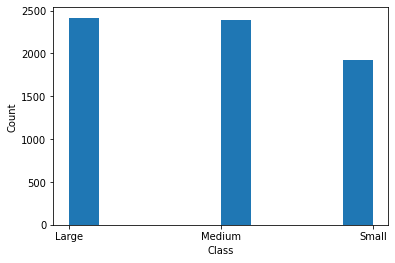

In [2859]:
import matplotlib.pyplot as plt

x = wildfire1['Fire Size Rank']

plt.xlabel('Class')
plt.ylabel('Count')
plt.hist(x)
plt.show()

In [2860]:
#After changing our class labels, we can delete the AcresBurned column in both dataframes since it
#will not be a feature we use.
wildfire1 = wildfire1.drop(columns = ['AcresBurned'], inplace = False)
wildfire2 = wildfire2.drop(columns = ['AcresBurned'], inplace = False)

#reset indexes to clean things up
wildfire1.reset_index()
wildfire2.reset_index()

,index,Fire Size Rank,Discovery Month,AWND,CLDD,DP10,DX90,PRCP,TAVG,TMAX,TMIN,PRCP_6M,PRCP_RS,DX90_2M,DP10_2M,Receives Snow,Mar_SP,Mar_WC,Mar_Dens,Elevation
0,0,Large,Jul,6.5,0.0,0.0,0.0,0.00,58.8,65.2,52.4,14.11,21.42,0.0,1.0,0,0.0,0.0,0.00,961.2744
1,1,Large,Jun,6.7,529.0,0.0,22.0,0.00,82.6,96.6,68.6,4.68,4.88,15.0,4.0,1,36.0,16.0,0.44,3389.0664
2,2,Large,Aug,6.9,237.0,0.0,23.0,0.00,72.6,92.6,52.6,2.52,8.09,43.0,0.0,0,0.0,0.0,0.00,1049.8560
3,3,Large,Aug,6.5,455.0,0.0,28.0,0.00,79.7,94.6,64.7,3.41,6.45,43.0,0.0,0,0.0,0.0,0.00,4192.8624
4,4,Large,Aug,4.5,0.0,0.0,0.0,0.02,56.4,62.9,49.9,18.03,54.17,0.0,2.0,1,77.0,34.0,0.44,3244.7112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,1139,Small,Jun,7.4,338.0,0.0,22.0,0.00,76.3,92.6,59.9,25.55,25.71,2.0,7.0,0,0.0,0.0,0.00,2178.4512
1041,1140,Small,Oct,5.6,167.0,0.0,11.0,0.00,69.9,86.1,53.7,0.49,12.66,48.0,0.0,0,0.0,0.0,0.00,1381.2168
1042,1141,Small,Oct,7.8,57.0,0.0,1.0,0.02,63.5,78.8,48.2,3.73,27.33,42.0,3.0,1,159.0,65.0,0.41,623.3520
1043,1142,Small,Sep,5.8,237.0,0.0,14.0,0.00,72.4,88.7,56.1,3.73,11.86,57.0,0.0,1,146.5,64.5,0.44,321.5184


In [2861]:
print(wildfire1.shape)
wildfire1.head(5)

(6729, 19)


,Fire Size Rank,Discovery Month,AWND,CLDD,DP10,DX90,PRCP,TAVG,TMAX,TMIN,PRCP_6M,PRCP_RS,DX90_2M,DP10_2M,Receives Snow,Mar_SP,Mar_WC,Mar_Dens,Elevation
16,Large,Oct,5.4,0.0,4.0,0.0,3.68,41.0,55.0,27.0,1.38,14.76,0.0,0.0,1.0,8.0,3.0,0.38,6141.6576
17,Large,Oct,5.4,0.0,4.0,0.0,3.68,41.0,55.0,27.0,1.38,14.76,0.0,0.0,1.0,87.2,28.4,0.33,5006.5008
45,Medium,Jul,6.5,4.0,0.0,0.0,0.00,63.2,72.6,53.8,12.55,18.62,0.0,2.0,0.0,0.0,0.0,0.00,2536.0584
66,Medium,Jul,4.7,26.0,0.0,0.0,0.02,63.6,82.5,44.7,13.69,18.22,0.0,7.0,1.0,92.0,39.0,0.42,6397.5600
97,Large,Jul,6.9,701.0,0.0,30.0,0.00,87.6,101.2,74.0,6.42,8.49,17.0,2.0,1.0,81.3,31.3,0.38,2673.8520


In [2862]:
print(wildfire2.shape)
wildfire2.head(5)

(1045, 19)


,Fire Size Rank,Discovery Month,AWND,CLDD,DP10,DX90,PRCP,TAVG,TMAX,TMIN,PRCP_6M,PRCP_RS,DX90_2M,DP10_2M,Receives Snow,Mar_SP,Mar_WC,Mar_Dens,Elevation
0,Large,Jul,6.5,0.0,0.0,0.0,0.00,58.8,65.2,52.4,14.11,21.42,0.0,1.0,0,0.0,0.0,0.00,961.2744
1,Large,Jun,6.7,529.0,0.0,22.0,0.00,82.6,96.6,68.6,4.68,4.88,15.0,4.0,1,36.0,16.0,0.44,3389.0664
2,Large,Aug,6.9,237.0,0.0,23.0,0.00,72.6,92.6,52.6,2.52,8.09,43.0,0.0,0,0.0,0.0,0.00,1049.8560
3,Large,Aug,6.5,455.0,0.0,28.0,0.00,79.7,94.6,64.7,3.41,6.45,43.0,0.0,0,0.0,0.0,0.00,4192.8624
4,Large,Aug,4.5,0.0,0.0,0.0,0.02,56.4,62.9,49.9,18.03,54.17,0.0,2.0,1,77.0,34.0,0.44,3244.7112


Double check our datatypes before we proceed with preprocessing and model building. As we can see, all features besides discovery and fire size rank are numerical (of type float) so all we have to do is one hot encode the discovery month of the fire.

In [2863]:
wildfire1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6729 entries, 16 to 114534
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fire Size Rank   6729 non-null   object 
 1   Discovery Month  6729 non-null   object 
 2   AWND             6729 non-null   float64
 3   CLDD             6729 non-null   float64
 4   DP10             6729 non-null   float64
 5   DX90             6729 non-null   float64
 6   PRCP             6729 non-null   float64
 7   TAVG             6729 non-null   float64
 8   TMAX             6729 non-null   float64
 9   TMIN             6729 non-null   float64
 10  PRCP_6M          6729 non-null   float64
 11  PRCP_RS          6729 non-null   float64
 12  DX90_2M          6729 non-null   float64
 13  DP10_2M          6729 non-null   float64
 14  Receives Snow    6729 non-null   float64
 15  Mar_SP           6729 non-null   float64
 16  Mar_WC           6729 non-null   float64
 17  Mar_Dens   

In [2864]:
wildfire2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1143
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fire Size Rank   1045 non-null   object 
 1   Discovery Month  1045 non-null   object 
 2   AWND             1045 non-null   float64
 3   CLDD             1045 non-null   float64
 4   DP10             1045 non-null   float64
 5   DX90             1045 non-null   float64
 6   PRCP             1045 non-null   float64
 7   TAVG             1045 non-null   float64
 8   TMAX             1045 non-null   float64
 9   TMIN             1045 non-null   float64
 10  PRCP_6M          1045 non-null   float64
 11  PRCP_RS          1045 non-null   float64
 12  DX90_2M          1045 non-null   float64
 13  DP10_2M          1045 non-null   float64
 14  Receives Snow    1045 non-null   int64  
 15  Mar_SP           1045 non-null   float64
 16  Mar_WC           1045 non-null   float64
 17  Mar_Dens      

# Below we use the describe function to get a general outlook on mean, max, min, and percentiles for each of the numerical features

In [2865]:
wildfire1.describe()

,AWND,CLDD,DP10,DX90,PRCP,TAVG,TMAX,TMIN,PRCP_6M,PRCP_RS,DX90_2M,DP10_2M,Receives Snow,Mar_SP,Mar_WC,Mar_Dens,Elevation
count,6729.000000,6729.000000,6729.000000,6729.000000,6729.000000,6729.000000,6729.000000,6729.000000,6729.000000,6729.000000,6729.000000,6729.000000,6729.000000,6729.000000,6729.000000,6729.000000,6729.000000
mean,6.702541,271.020211,0.523555,15.031654,0.239535,71.990088,86.781557,57.198172,8.569530,15.063047,20.626096,2.281914,0.503790,29.737673,12.420672,0.198037,1999.682461
std,1.970851,211.760379,1.206312,11.110703,0.693004,9.734844,11.500374,8.965508,7.778671,11.702677,19.374590,3.370507,0.500023,41.377851,18.004252,0.228038,1962.810177
min,1.100000,0.000000,0.000000,0.000000,0.000000,31.200000,43.400000,16.800000,0.000000,0.140000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-229.656000
25%,5.100000,77.000000,0.000000,3.000000,0.000000,65.900000,79.400000,52.500000,3.080000,7.040000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,439.627200
50%,6.700000,261.000000,0.000000,17.000000,0.000000,73.500000,89.700000,57.600000,6.600000,11.850000,15.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1312.320000
75%,7.800000,418.000000,1.000000,25.000000,0.150000,78.500000,94.900000,62.800000,11.990000,19.820000,36.000000,3.000000,1.000000,59.600000,23.400000,0.400000,3047.863200
max,16.800000,1113.000000,16.000000,31.000000,18.140000,100.900000,114.300000,89.000000,81.180000,88.290000,62.000000,28.000000,1.000000,215.000000,113.000000,1.560000,10764.304800


In [2866]:
wildfire2.describe()

,AWND,CLDD,DP10,DX90,PRCP,TAVG,TMAX,TMIN,PRCP_6M,PRCP_RS,DX90_2M,DP10_2M,Receives Snow,Mar_SP,Mar_WC,Mar_Dens,Elevation
count,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000
mean,6.525742,280.460287,0.477512,15.095694,0.214000,72.681340,87.577225,57.786316,11.086775,20.378737,22.084211,2.185646,0.428708,29.837608,13.222010,0.173847,1746.584897
std,1.709131,214.381034,1.207703,11.325404,0.747745,9.078201,10.850520,8.447699,9.622936,15.695159,20.203481,3.292274,0.495128,46.657148,21.222762,0.218215,1585.636503
min,1.300000,0.000000,0.000000,0.000000,0.000000,34.000000,49.300000,18.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-193.567200
25%,5.400000,79.000000,0.000000,3.000000,0.000000,66.300000,80.300000,52.900000,4.200000,10.180000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,587.263200
50%,6.500000,274.000000,0.000000,16.000000,0.000000,73.900000,89.600000,57.900000,8.840000,15.690000,17.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1286.073600
75%,7.600000,432.000000,0.000000,26.000000,0.100000,79.200000,95.700000,62.900000,14.510000,25.280000,40.000000,3.000000,1.000000,51.500000,23.000000,0.410000,2345.772000
max,15.000000,1005.000000,11.000000,31.000000,10.460000,97.400000,111.600000,85.000000,67.960000,87.180000,62.000000,22.000000,1.000000,178.500000,85.000000,0.580000,8743.332000


# One-Hot Encoding Categorical Variables


*   Encode the discovery month (the only categorical variable) in both datasets



In [2867]:
#Add the dummy columns to the first dataset
dummy_month = pd.get_dummies(wildfire1['Discovery Month'])
wildfire1 = pd.merge(left = wildfire1, right = dummy_month, left_index = True, right_index = True)
wildfire1 = wildfire1.drop(columns = ['Discovery Month'])
wildfire1.head(10)

,Fire Size Rank,AWND,CLDD,DP10,DX90,PRCP,TAVG,TMAX,TMIN,PRCP_6M,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
16,Large,5.4,0.0,4.0,0.0,3.68,41.0,55.0,27.0,1.38,...,0,0,0,0,0,0,0,0,1,0
17,Large,5.4,0.0,4.0,0.0,3.68,41.0,55.0,27.0,1.38,...,0,0,0,0,0,0,0,0,1,0
45,Medium,6.5,4.0,0.0,0.0,0.00,63.2,72.6,53.8,12.55,...,0,0,0,1,0,0,0,0,0,0
66,Medium,4.7,26.0,0.0,0.0,0.02,63.6,82.5,44.7,13.69,...,0,0,0,1,0,0,0,0,0,0
97,Large,6.9,701.0,0.0,30.0,0.00,87.6,101.2,74.0,6.42,...,0,0,0,1,0,0,0,0,0,0
137,Small,5.6,568.0,0.0,31.0,0.00,83.3,100.4,66.3,7.98,...,0,0,0,1,0,0,0,0,0,0
139,Small,5.6,568.0,0.0,31.0,0.00,83.3,100.4,66.3,7.98,...,0,0,0,1,0,0,0,0,0,0
141,Small,7.4,301.0,2.0,28.0,0.58,74.6,94.8,54.4,2.34,...,0,0,0,0,0,0,0,0,0,0
164,Small,7.6,274.0,1.0,22.0,0.45,74.4,94.1,54.8,9.72,...,0,0,0,1,0,0,0,0,0,0
178,Large,6.5,259.0,1.0,17.0,1.64,73.9,90.9,56.9,6.11,...,0,0,0,0,0,0,0,0,0,0


In [2868]:
#Add the dummy columns to the second dataset
dummy_month2 = pd.get_dummies(wildfire2['Discovery Month'])
wildfire2 = pd.merge(left = wildfire2, right = dummy_month2, left_index = True, right_index = True)
wildfire2 = wildfire2.drop(columns = ['Discovery Month'])
wildfire2.head(5)

,Fire Size Rank,AWND,CLDD,DP10,DX90,PRCP,TAVG,TMAX,TMIN,PRCP_6M,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Large,6.5,0.0,0.0,0.0,0.00,58.8,65.2,52.4,14.11,...,0,0,0,1,0,0,0,0,0,0
1,Large,6.7,529.0,0.0,22.0,0.00,82.6,96.6,68.6,4.68,...,0,0,0,0,1,0,0,0,0,0
2,Large,6.9,237.0,0.0,23.0,0.00,72.6,92.6,52.6,2.52,...,0,0,0,0,0,0,0,0,0,0
3,Large,6.5,455.0,0.0,28.0,0.00,79.7,94.6,64.7,3.41,...,0,0,0,0,0,0,0,0,0,0
4,Large,4.5,0.0,0.0,0.0,0.02,56.4,62.9,49.9,18.03,...,0,0,0,0,0,0,0,0,0,0


In [2869]:
#Radomly Shuffle both dataframes to get rid of any pre-existing organization based on size
wildfire1 = wildfire1.sample(frac=1).reset_index(drop=True)
wildfire2 = wildfire2.sample(frac=1).reset_index(drop=True)

In [2870]:
#Write the clean, encoded, and randomly shuffled data to csv's before continuing 
wildfire1.to_csv('wildfire1_clean.csv')
wildfire2.to_csv('wildfire2_clean.csv')

Split the training data into train-test sets

In [2871]:
#We will train our models using the first dataset, then see how it performs on our second dataframe containing more recent wildfires in the state of California

In [2872]:
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler

In [2873]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay

In [2874]:
features = wildfire2.drop(columns = ['Fire Size Rank'])
target = wildfire2['Fire Size Rank']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state = 8)

In [2875]:
print('X_train dimensions: ', X_train.shape)
print('y_train dimensions: ', y_train.shape)
print('X_test dimensions: ', X_test.shape)
print('y_test dimensions: ', y_test.shape)

X_train dimensions:  (836, 29)
y_train dimensions:  (836,)
X_test dimensions:  (209, 29)
y_test dimensions:  (209,)


Normalize data using min-max-scalar after splitting into train and test

In [2876]:
scaler = MinMaxScaler()
#Normalize the train and test independently after splitting the two
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.fit_transform(X_test)

Feature Selection

In [2877]:
from sklearn.feature_selection import SelectKBest, f_classif

Model Building:

# Define a new evaluation metric:
Because through experimenting with model building I have found it difficult to build a super accurate classifier with the data we have, I redefine a new evaluation metric that we will call adjusted_accuracy.


Essentially, this metric will consider a medium sized fire classified as medium or large and a small fire classified as small or medium to be correct classifications. 

In [2878]:
def adjusted_accuracy(confusion_matrix):
  large = confusion_matrix[0][0]
  medium_large = confusion_matrix[1][1] + confusion_matrix[1][0]
  small_medium = confusion_matrix[2][2] + confusion_matrix[2][1]
  total = 0
  for lists in confusion_matrix:
    for item in lists:
      total += item
  adjusted_accuracy = (large + medium_large + small_medium)/total
  return adjusted_accuracy

# KNN Classifier

In [2879]:
from sklearn.neighbors import KNeighborsClassifier

In [2880]:
#KNN works best with more features

In [2881]:
best_features = SelectKBest(f_classif, k=29)
X_kbest_knn = best_features.fit_transform(X_train_scaled, y_train)

In [2882]:
knn = KNeighborsClassifier(n_neighbors=22, metric = 'manhattan').fit(X_kbest_knn, y_train)
cv = cross_val_score(knn, X_kbest_knn, y_train, cv =5)
print((cv.mean()))

0.373260621613915


In [2883]:
y_pred = knn.predict(X_test_scaled)

In [2884]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[58 14 14]
 [29 21 17]
 [30  7 19]]


[[58 14 14]
 [29 21 17]
 [30  7 19]]


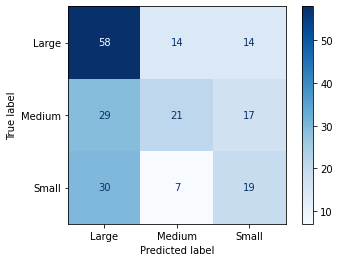

In [2885]:
disp = ConfusionMatrixDisplay.from_estimator(
        knn,
        X_test_scaled,
        y_test,
        cmap=plt.cm.Blues,
    )

print(disp.confusion_matrix)

In [2886]:
print(adjusted_accuracy(confusion))

0.6411483253588517


# SVM Classifier

In [2887]:
from sklearn import svm
from sklearn.svm import SVC

In [2888]:
best_features = SelectKBest(f_classif, k=8)
X_kbest = best_features.fit_transform(X_train_scaled, y_train)
X_test_kbest = best_features.fit_transform(X_test_scaled, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [21 24] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Try SVM Classifier with linear boundary in addition to with the polynomial and Gaussian kernels. Note: all three perform about the same with our data

In [2889]:
linear_boundary = svm.SVC().fit(X_kbest,y_train)
#cv = cross_val_score(linear_boundary, X_kbest, y_train, cv = 5)
#print(cv)
#print(cv.mean())

In [2890]:
y_pred = linear_boundary.predict(X_test_kbest)

In [2891]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[63  3 20]
 [53  3 11]
 [31  1 24]]


[[63  3 20]
 [53  3 11]
 [31  1 24]]


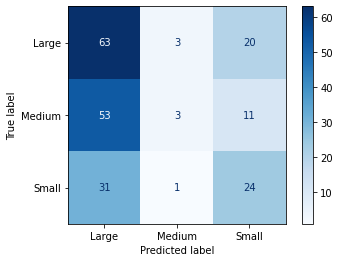

In [2892]:
disp = ConfusionMatrixDisplay.from_estimator(
        linear_boundary,
        X_test_kbest,
        y_test,
        cmap=plt.cm.Blues,
    )

print(disp.confusion_matrix)

In [2893]:
print(adjusted_accuracy(confusion))

0.6889952153110048


In [2894]:
#SVM using the quadratic kernel
polynomial_ker = svm.SVC(kernel='poly', degree=2).fit(X_kbest, y_train)
#cv = cross_val_score(polynomial_ker, X_kbest, y_train, cv = 5)
#print(cv)
#print(cv.mean())

In [2895]:
y_pred = polynomial_ker.predict(X_test_kbest)

In [2896]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[68  4 14]
 [59  3  5]
 [43  2 11]]


[[68  4 14]
 [59  3  5]
 [43  2 11]]


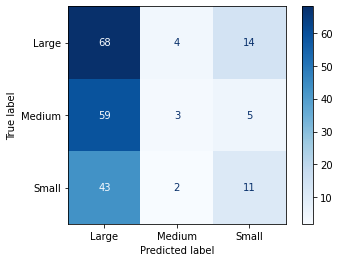

In [2897]:
disp = ConfusionMatrixDisplay.from_estimator(
        polynomial_ker,
        X_test_kbest,
        y_test,
        cmap=plt.cm.Blues,
    )

print(disp.confusion_matrix)

In [2898]:
print(adjusted_accuracy(confusion))

0.6842105263157895


In [2899]:
#SVM using the degree 3 polynomial kernel
poly_kernel_3 = svm.SVC(kernel='poly', degree=3).fit(X_kbest, y_train)
#cv = cross_val_score(polynomial_ker, X_kbest, y_train, cv = 5)
#print(cv)
#print(cv.mean())

In [2900]:
y_pred = poly_kernel_3.predict(X_test_kbest)

In [2901]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[64  7 15]
 [57  4  6]
 [44  2 10]]


[[64  7 15]
 [57  4  6]
 [44  2 10]]


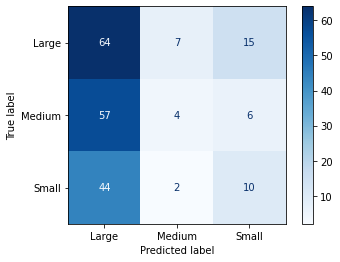

In [2902]:
disp = ConfusionMatrixDisplay.from_estimator(
        poly_kernel_3,
        X_test_kbest,
        y_test,
        cmap=plt.cm.Blues,
    )

print(disp.confusion_matrix)

In [2903]:
print(adjusted_accuracy(confusion))

0.6555023923444976


# Naive Bayes Classifier


*   This algorithm performs well on our dataset



In [2904]:
from sklearn.naive_bayes import GaussianNB

In [2905]:
gnb = GaussianNB().fit(X_kbest, y_train)
cv = cross_val_score(gnb, X_kbest, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.375      0.37724551 0.37724551 0.37125749 0.37724551]
0.3755988023952096


In [2906]:
y_pred = gnb.predict(X_test_kbest)

In [2907]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[45  6 35]
 [26  6 35]
 [19  8 29]]


[[45  6 35]
 [26  6 35]
 [19  8 29]]


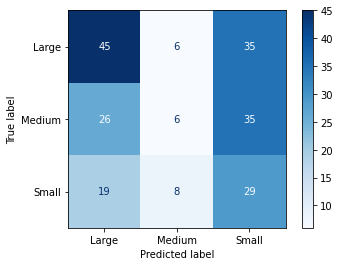

In [2908]:
disp = ConfusionMatrixDisplay.from_estimator(
        gnb,
        X_test_kbest,
        y_test,
        cmap=plt.cm.Blues,
    )

print(disp.confusion_matrix)

In [2909]:
print(adjusted_accuracy(confusion))

0.5454545454545454


In [2910]:
best_features = SelectKBest(f_classif, k=15)
X_kbest_other = best_features.fit_transform(X_train_scaled, y_train)

# Decision Tree Classifier

In [2911]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [2912]:
dt = DecisionTreeClassifier().fit(X_kbest, y_train)
cv = cross_val_score(dt, X_kbest, y_train, cv =5)
print(cv)
print(cv.mean())

[0.32738095 0.37724551 0.32335329 0.34730539 0.33532934]
0.3421228970630168


In [2913]:
y_pred = dt.predict(X_test_kbest)

In [2914]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[25 14 47]
 [17 10 40]
 [ 9 15 32]]


[[25 14 47]
 [17 10 40]
 [ 9 15 32]]


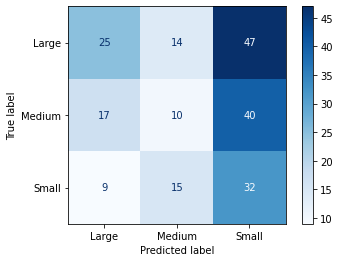

In [2915]:
disp = ConfusionMatrixDisplay.from_estimator(
        dt,
        X_test_kbest,
        y_test,
        cmap=plt.cm.Blues,
    )

print(disp.confusion_matrix)

In [2916]:
print(adjusted_accuracy(confusion))

0.47368421052631576


# Random Forest Classifier

In [2917]:
from sklearn.ensemble import RandomForestClassifier

In [2918]:
rf = RandomForestClassifier().fit(X_kbest,y_train)
cv = cross_val_score(rf, X_kbest, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.29761905 0.37724551 0.33532934 0.38922156 0.41916168]
0.3637154262902766


In [2919]:
y_pred = rf.predict(X_test_kbest)

In [2920]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[40 19 27]
 [23 17 27]
 [12 15 29]]


[[40 19 27]
 [23 17 27]
 [12 15 29]]


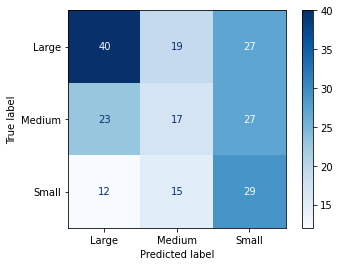

In [2921]:
disp = ConfusionMatrixDisplay.from_estimator(
        rf,
        X_test_kbest,
        y_test,
        cmap=plt.cm.Blues,
    )

print(disp.confusion_matrix)

In [2922]:
print(adjusted_accuracy(confusion))

0.5933014354066986


# Gradient Boost Classifier

In [2923]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier().fit(X_kbest,y_train)
cv = cross_val_score(gb, X_kbest, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.30952381 0.36526946 0.35928144 0.29341317 0.38323353]
0.3421442828628457


In [2924]:
y_pred = gb.predict(X_test_kbest)

In [2925]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[46  3 37]
 [24  2 41]
 [16  1 39]]


[[46  3 37]
 [24  2 41]
 [16  1 39]]


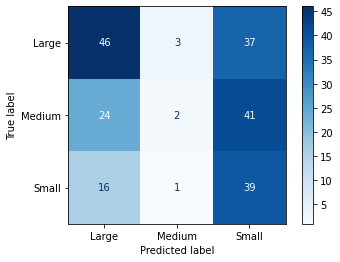

In [2926]:
disp = ConfusionMatrixDisplay.from_estimator(
        gb,
        X_test_kbest,
        y_test,
        cmap=plt.cm.Blues,
    )

print(disp.confusion_matrix)

In [2927]:
print(adjusted_accuracy(confusion))

0.5358851674641149


KNN Classifier #2

In [2928]:
knn2 = KNeighborsClassifier(n_neighbors=10).fit(X_kbest, y_train)
cv = cross_val_score(knn, X_kbest_knn, y_train, cv =5)
print(cv)
print(cv.mean())

[0.32738095 0.38922156 0.4011976  0.36526946 0.38323353]
0.373260621613915


In [2929]:
y_pred = knn2.predict(X_test_kbest)

In [2930]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[45 17 24]
 [36 14 17]
 [24  8 24]]


[[45 17 24]
 [36 14 17]
 [24  8 24]]


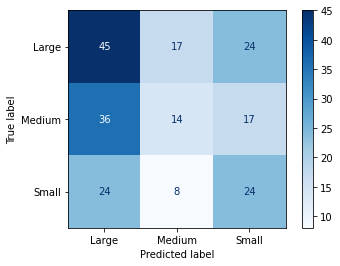

In [2931]:
disp = ConfusionMatrixDisplay.from_estimator(
        knn2,
        X_test_kbest,
        y_test,
        cmap=plt.cm.Blues,
    )

print(disp.confusion_matrix)

In [2932]:
print(adjusted_accuracy(confusion))

0.6076555023923444


# Neural Network Multiclass classifier (TensorFlow)
- Experiment by changing number of hidden layers and activation functions (sigmoid, relu, softmax)
- Change number of epochs and add more hidden layers
- Size of input = number of features in the dataset
- Size of output = number of classes in the multiclass classification problem

In [2933]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns

# Voting Classifier

In [2934]:
from sklearn.ensemble import VotingClassifier